In [2]:
# Order n equations.

In [62]:
import numpy as np
# Parameter values
g  = 9.80665    # m/s^2
cd = 0.2028    # kg/m
m  = 80     #kg

# 2차 미분방정식을 두개의 1차미분방정식으로 둔갑함.

def f(t,y):
    y0,y1 = y
    f1 = y1
#    f2 = g - (cd/m)*y1**2.0
    f2 = g - (cd/m)*abs(y1)
    return [f1,f2]

from scipy.integrate import solve_ivp
y0 = [0,0]    # [y0, y1] t = 0 일때
tspan = [0,10000]
t_array = np.linspace(0,100,100)
sol = solve_ivp(f,tspan,y0,t_events = t_array)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 122
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 1.11111000e+01, 9.37294098e+01,
       2.82888065e+02, 5.70831540e+02, 9.49558535e+02, 1.41879425e+03,
       1.99647713e+03, 2.72363579e+03, 3.67475005e+03, 4.97133011e+03,
       6.65220431e+03, 7.83533166e+03, 9.01845902e+03, 1.00000000e+04])
 t_events: None
        y: array([[0.00000000e+00, 4.90332459e-08, 5.93301774e-06, 6.04133007e-04,
        6.05170887e-02, 6.04768720e+00, 5.99703817e+02, 3.98584073e+04,
        3.13265104e+05, 1.04129270e+06, 2.28493198e+06, 4.00464044e+06,
        6.20728163e+06, 9.01214966e+06, 1.26901267e+07, 1.77059341e+07,
        2.42098690e+07, 2.87859938e+07, 3.33624693e+07, 3.71591137e+07],
       [0.00000000e+00, 9.80664876e-04, 1.07873000e-02, 1.08852284e-01,
     

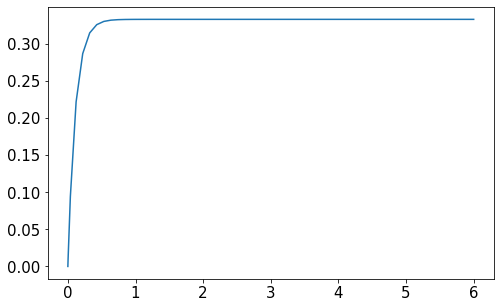

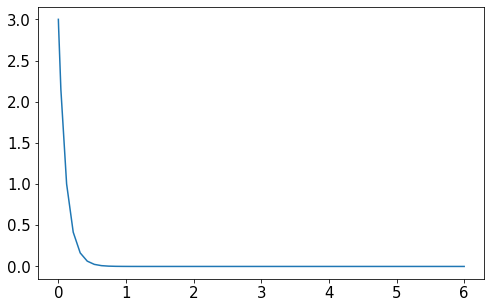

In [84]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 15})
plt.plot(sol.t,sol.y[0])
plt.show()
plt.plot(sol.t,sol.y[1])
plt.show()

### ivp, bvp 연습문제.

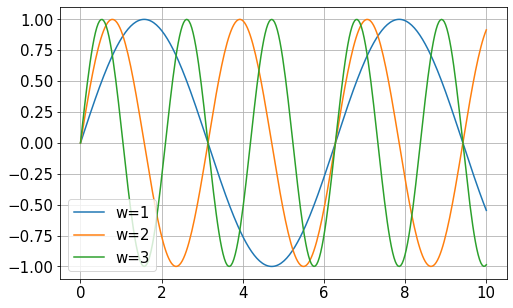

In [203]:
from scipy.integrate import solve_ivp

def f(t,y,w):
    y0, y1 = y
    f1 = y1
    f2 = -(w**2)*y0
    return [f1,f2]

for w in range(1,4):
    y0 = [0,w]
    xspan = [0,10]
    teval = np.linspace(0,10,300)
    sol = solve_ivp(f,xspan,y0,args=[w],dense_output=True,t_eval=teval)
    plt.plot(sol.t,sol.y[0],label=f'w={w}')
plt.grid()
plt.legend()
plt.show()

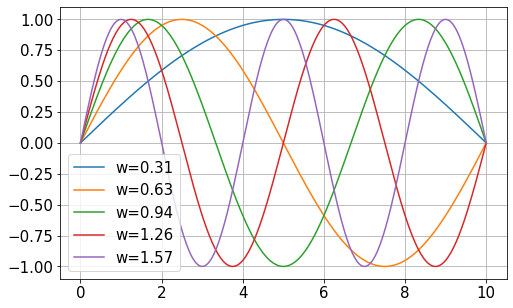

In [200]:
from scipy.integrate import solve_ivp

def f(t,y,w):
    y0, y1 = y
    f1 = y1
    f2 = -(w**2)*y0
    return [f1,f2]

for w in np.arange(np.pi/10,np.pi/10*6,np.pi/10):
    y0 = [0,w]
    xspan = [0,10]
    teval = np.linspace(0,10,300)
    sol = solve_ivp(f,xspan,y0,args=[w],dense_output=True,t_eval=teval)
    plt.plot(sol.t,sol.y[0],label=f'w={round(w,2)}')
plt.grid()
plt.legend()
plt.show()

In [201]:
def error(w):
    sol = solve_ivp(f,xspan,[0,w],args=[w],t_eval=teval)
    error = sol.y[0][-1]
    
    return error

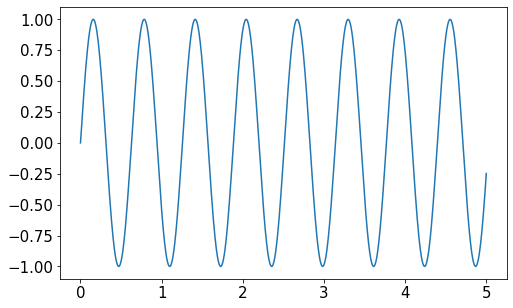

In [202]:
warray = np.linspace(0,5,1000)

vfun = np.vectorize(error)

plt.plot(warray,vfun(warray))
# root_scalar 로 해 찾을 수 있다.

1.4043634615550666e-06


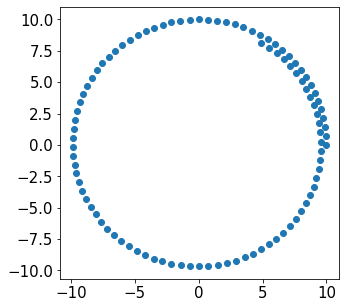

In [244]:
# 변수 치환을 하여 1차 방정식을 만들기
# F vector  함수를 만들기
# solver를 부르기
# 그림을 그리기
plt.rcParams["figure.figsize"] = (5,5)

def f(t,y):
    G = 100
    M = 20
    x0, x1, y0, y1 = y
    f1 = x1
    f2 = -G*M*x0 / ((x0**2+y0**2)**(3/2))
    f3 = y1
    f4 = -G*M*y0 / ((x0**2+y0**2)**(3/2))
    return [f1, f2, f3, f4]

y0 = [10,0,0,14.153]
tspan = [0,20]
teval = np.linspace(0,5,100)
sol=solve_ivp(f,tspan,y0,t_eval=teval)
r_x = sol.y[0].max()
r_y = sol.y[2].max()
e = (r_x-r_y)/(r_x+r_y)
print(e)
plt.scatter(sol.y[0],sol.y[2])